# 1. Introduction to Seaborn

#### Python Visualization Landscape
The python visualization landscape is complex and can be overwhelming

<img style="width: 700px;" src="img/python-viz-landscape.png">

#### Matplotlib
- `matplotlib` provides the raw building blocks for Seaborn's visualizations
- It can also be used on its own to plot data

In [2]:
import warnings
warnings.filterwarnings('ignore')

import os
print(os.listdir("data/"))

['bike_share.csv', 'college_datav3.csv', 'daily_show_guests_cleaned.csv', 'FY18_4050_FMRs.csv', 'insurance_premiums.csv', 'schoolimprovement2010grants.csv', 'wine.csv']


In [3]:
import matplotlib.pyplot as plt
import pandas as pd

wine = pd.read_csv("data/wine.csv")
fig, ax = plt.subplots()

ax.hist(wine['alcohol'])

(array([4.000e+01, 1.133e+03, 1.662e+03, 1.156e+03, 1.092e+03, 6.280e+02,
        5.690e+02, 1.750e+02, 4.100e+01, 1.000e+00]),
 array([ 8.  ,  8.69,  9.38, 10.07, 10.76, 11.45, 12.14, 12.83, 13.52,
        14.21, 14.9 ]),
 <a list of 10 Patch objects>)

#### Pandas
- `pandas` is a foundational library for analyzing data
- It also supports basic plotting capability

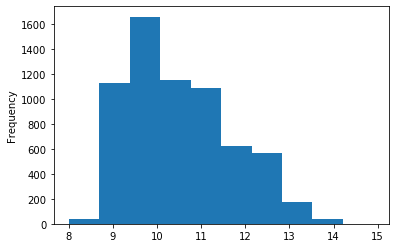

In [4]:
wine['alcohol'].plot.hist()

#### Seaborn
- Seaborn supports complex visualizations of data
- It is built on matplotlib and works best with pandas dataframes
- The `distplot` is similar to the histogram shown in previous examples
- By default, generates a Gaussian Kernel Density Estimate (KDE)

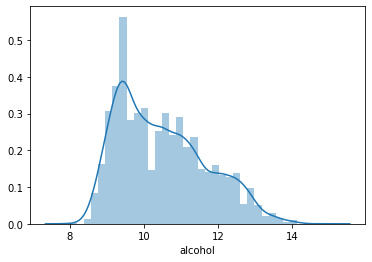

In [5]:
import seaborn as sns

sns.distplot(wine['alcohol'])

#### Histogram vs. Distplot

Pandas histogram
- `wine['alcohol'].plot.hist()`
- Actual frequency of observations
- No automatic labels
- Wide bins

Seaborn distplot
- `sns.distplot(wine['alcohol'])`
- Automatic label on x axis
- Muted color palette
- KDE plot
- Narrow bins

#### Import All Data

In [6]:
import numpy as np

# Import the data
school = pd.read_csv("data/schoolimprovement2010grants.csv", index_col=0)
bike = pd.read_csv("data/bike_share.csv")
insurance = pd.read_csv("data/insurance_premiums.csv")
college = pd.read_csv("data/college_datav3.csv")
daily = pd.read_csv("data/daily_show_guests_cleaned.csv")
fmr = pd.read_csv("data/FY18_4050_FMRs.csv")

# Fill "PrivacySuppressed" (identifying as Nan) with Nan 
college.replace("PrivacySuppressed", np.nan, inplace=True)
#college.loc[college.DEBT_MDN=='PrivacySuppressed', 'PrivacySuppressed'] = np.nan

# Remove rows with Nan values
college.dropna(how='any', inplace=True)

# Reset the index after remove Nan values
college.reset_index(drop=True, inplace=True)

#### Comparing a histogram and distplot

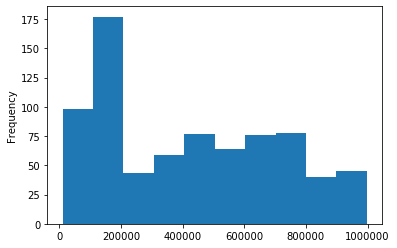

<Figure size 432x288 with 0 Axes>

In [7]:
# Display pandas histogram
school['Award_Amount'].plot.hist()
plt.show()

# Clear out the pandas histogram
plt.clf()

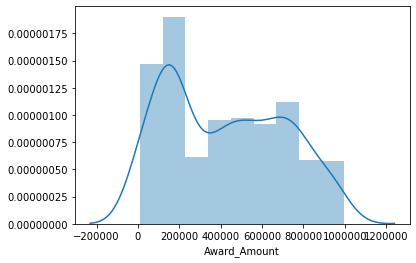

<Figure size 432x288 with 0 Axes>

In [8]:
# Display a Seaborn distplot
sns.distplot(school['Award_Amount'])
plt.show()

# Clear the distplot
plt.clf()

#### Using the distribution plot
Creating a histogram
- Distplot function has multiple optional arguments
- In order to plot a simple histogram, you can disable the kde and specify the number of bins to use

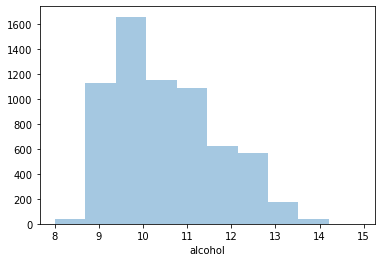

In [9]:
sns.distplot(wine['alcohol'], kde=False, bins=10)

#### Alternative data distributions
- A rug plot is an alternative way to view the distribution of data
- A kde curve and rug plot can be combined

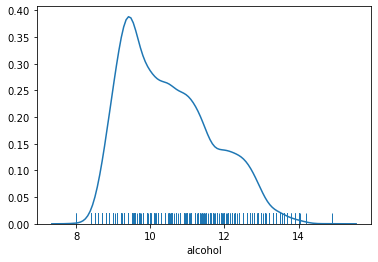

In [10]:
sns.distplot(wine['alcohol'], hist=False, rug=True)

#### Further Customizations
- The `distplot` function uses several functions including `kdeplot` and `rugplot`
- It is possible to further customize a plot by passing arguments to the underlying function

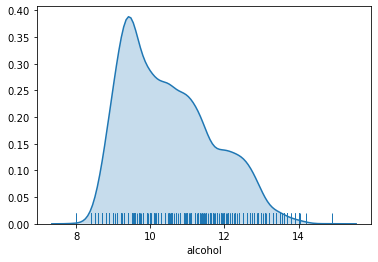

In [11]:
sns.distplot(wine['alcohol'], hist=False, rug=True, kde_kws={'shade':True})

#### Plot a histogram

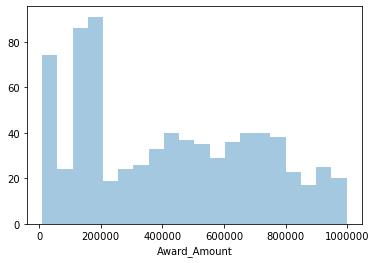

In [12]:
# Create a distplot
sns.distplot(school['Award_Amount'],
             kde=False,
             bins=20)

# Display the plot
plt.show()

#### Rug plot and kde shading

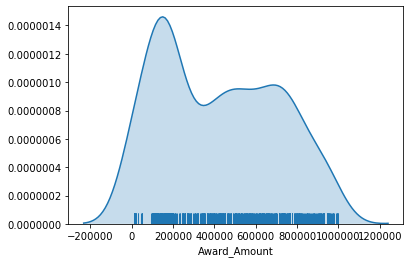

In [13]:
# Create a distplot of the Award Amount
sns.distplot(school['Award_Amount'],
             hist=False,
             rug=True,
             kde_kws={'shade':True})

# Plot the results
plt.show()

#### Regression Plots in Seaborn
Introduction to regplot
- The `regplot` function generates a scatter plot with a regression line
- Usage is similar to the `distplot`
- The data and `x` and `y` variables must be defined

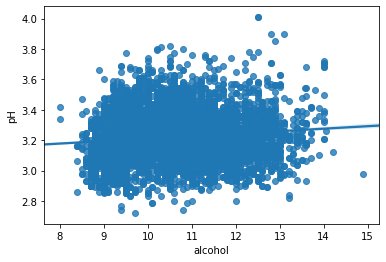

In [14]:
sns.regplot(x="alcohol", y="pH", data=wine)

#### lmplot() builds on top of the base regplot()
- `regplot` - low level
- `lmplot` - high level

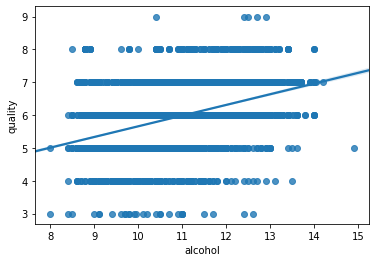

In [15]:
sns.regplot(x="alcohol", y="quality", data=wine)

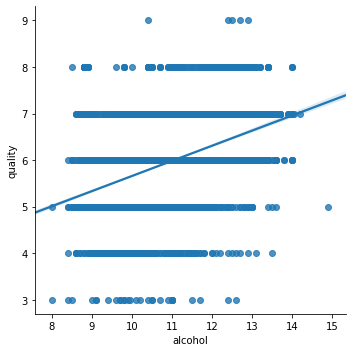

In [16]:
sns.lmplot(x="alcohol", y="quality", data=wine)

#### lmplot faceting
- Organize data by colors ( `hue` )
- Organize data by columns ( `col` )

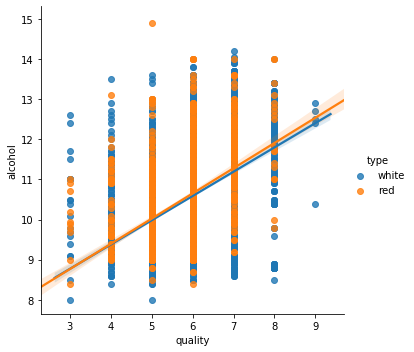

In [17]:
sns.lmplot(x="quality", y="alcohol", 
           data=wine, hue="type")

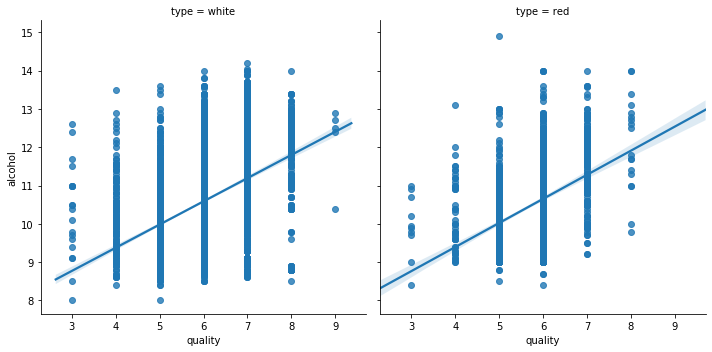

In [18]:
sns.lmplot(x="quality", y="alcohol", 
           data=wine, col="type")

#### Create a regression plot

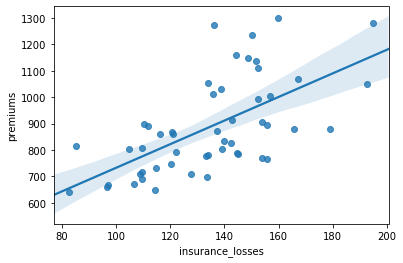

In [19]:
sns.regplot(data=insurance, 
            x="insurance_losses", 
            y="premiums")

# Display the plot
plt.show()

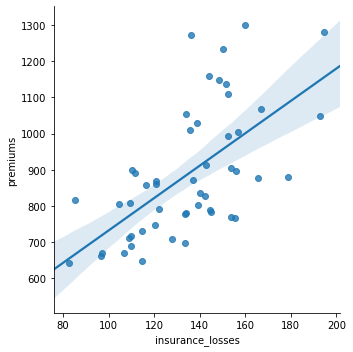

In [20]:
sns.lmplot(data=insurance, 
           x="insurance_losses", 
           y="premiums")

# Display the plot
plt.show()

#### Plotting multiple variables

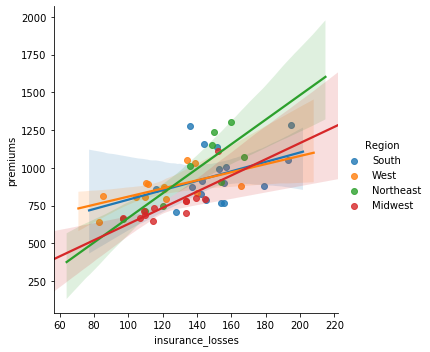

In [21]:
# Create a regression plot using hue
sns.lmplot(data=insurance, x="insurance_losses", 
           y="premiums", hue="Region")

# Show the results
plt.show()

#### Facetting multiple regressions

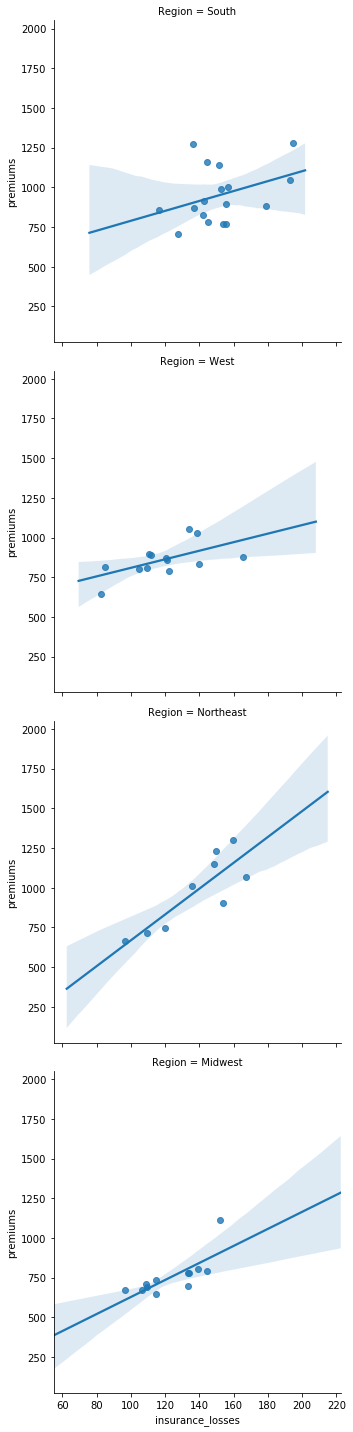

In [22]:
# Create a regression plot with multiple rows
sns.lmplot(data=insurance, x="insurance_losses", 
           y="premiums", row="Region")

# Show the plot
plt.show()

# 2. Using Seaborn Styles
Setting Styles
- Seaborn has default configurations that can be applied with `sns.set()`
- These styles can override matplotlib and pandas plots as well

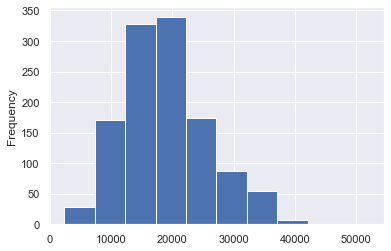

In [23]:
sns.set()
college['Tuition'].plot.hist()

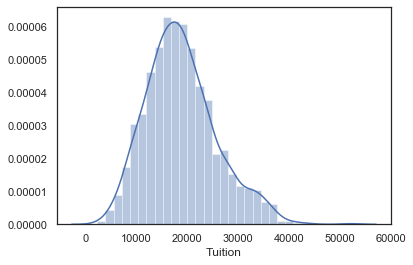

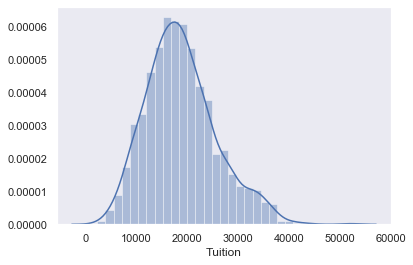

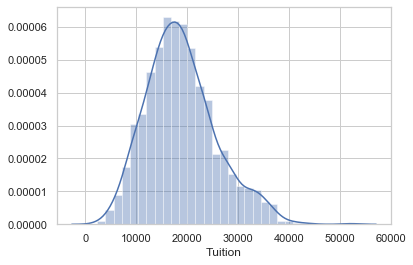

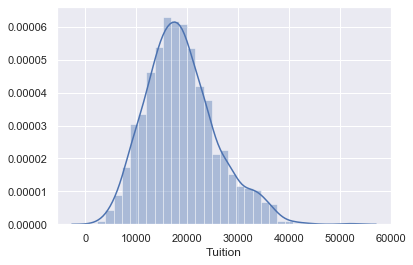

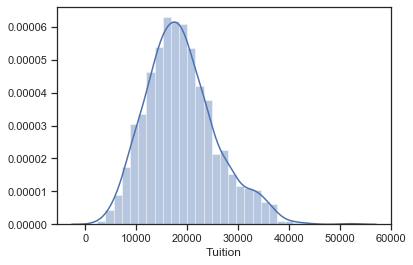

In [24]:
for style in ['white', 'dark', 'whitegrid', 'darkgrid', 'ticks']:
    sns.set_style(style)
    sns.distplot(college['Tuition'])
    plt.show()

#### Removing axes with despine()
- Sometimes plots are improved by removing elements
- Seaborn contains a shortcut for removing the spines of a plot

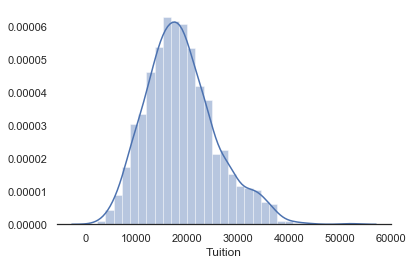

In [25]:
sns.set_style('white')
sns.distplot(college['Tuition'])
sns.despine(left=True)

#### Setting the default style

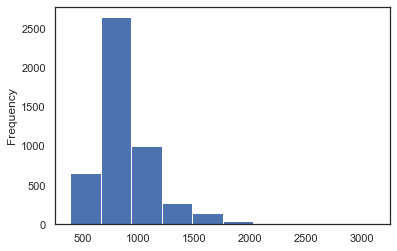

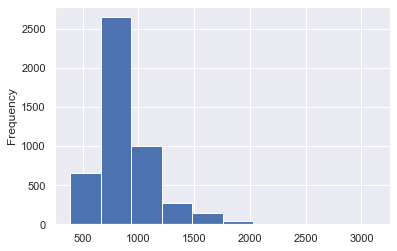

<Figure size 432x288 with 0 Axes>

In [26]:
# Plot the pandas histogram
fmr['fmr_2'].plot.hist()
plt.show()
plt.clf()

# Set the default seaborn style
sns.set()

# Plot the pandas histogram again
fmr['fmr_2'].plot.hist()
plt.show()
plt.clf()

#### Comparing styles

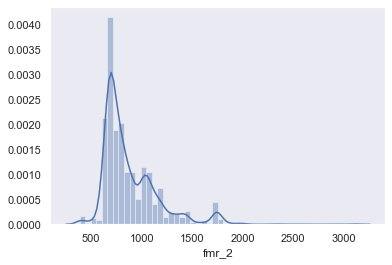

<Figure size 432x288 with 0 Axes>

In [27]:
# Plot with a dark style 
sns.set_style('dark')
sns.distplot(fmr['fmr_2'])
plt.show()

# Clear the figure
plt.clf()

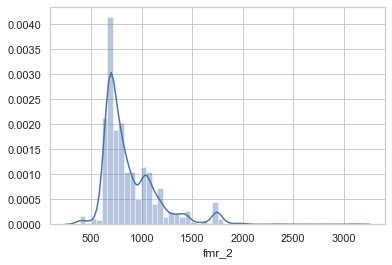

<Figure size 432x288 with 0 Axes>

In [28]:
# Plot with a dark style 
sns.set_style('whitegrid')
sns.distplot(fmr['fmr_2'])
plt.show()

# Clear the figure
plt.clf()

#### Removing spines

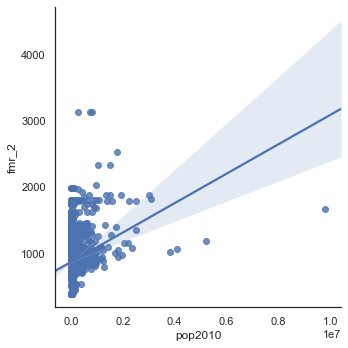

<Figure size 432x288 with 0 Axes>

In [29]:
# Set the style to white
sns.set_style('white')

# Create a regression plot
sns.lmplot(data=fmr,
           x='pop2010',
           y='fmr_2')

# Remove the spines
sns.despine()

# Show the plot and clear the figure
plt.show()
plt.clf()

#### Colors in Seaborn
Defining a color for a plot
- Seaborn supports assigning colors to plots using matplotlib color codes

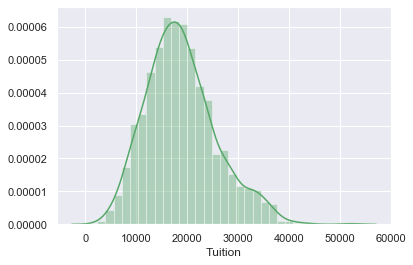

In [30]:
sns.set(color_codes=True)
sns.distplot(college['Tuition'], color='g')

#### Palettes
- Seaborn uses the `set_palette()` function to define a palette

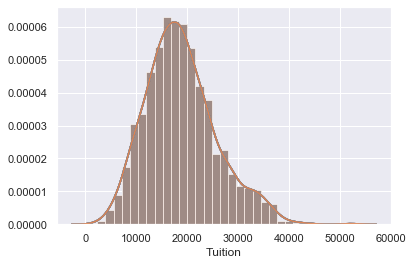

In [34]:
for p in sns.palettes.SEABORN_PALETTES:
    sns.set_palette(p)
    sns.distplot(college['Tuition'])

#### Displaying Palettes
- `sns.palplot()` function displays a palette
- `sns.color_palette()` returns the current palette

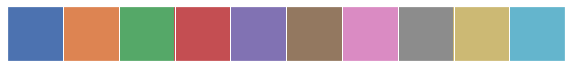

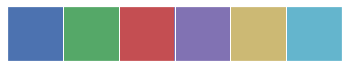

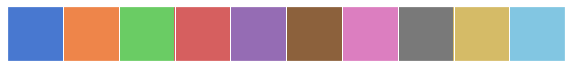

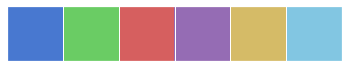

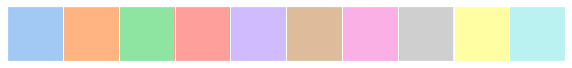

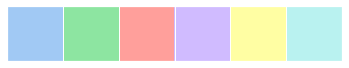

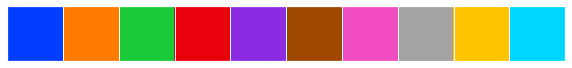

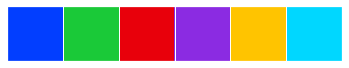

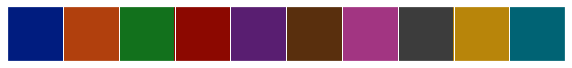

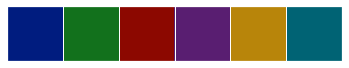

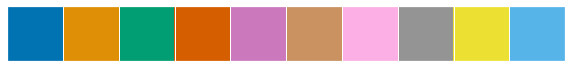

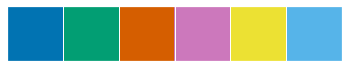

In [32]:
for p in sns.palettes.SEABORN_PALETTES:
    sns.set_palette(p)
    sns.palplot(sns.color_palette())
    plt.show()

#### Defining Custom Palettes

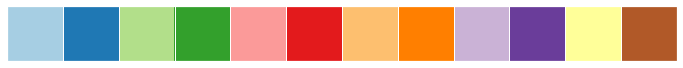

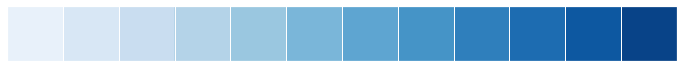

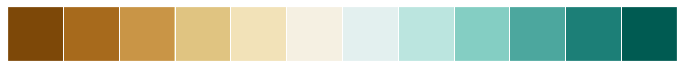

In [35]:
# Circular colors = when the data is not ordered
sns.palplot(sns.color_palette("Paired", 12))

# Sequential colors = when the data has a consistent range from high to low
sns.palplot(sns.color_palette("Blues", 12))

# Diverging colors = when both the low and high values are interesting
sns.palplot(sns.color_palette("BrBG", 12))

#### Matplotlib color codes

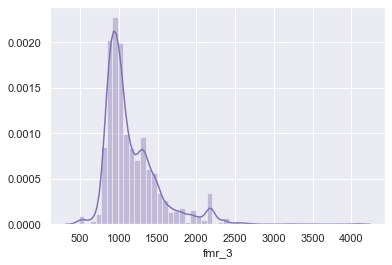

In [37]:
# Set style, enable color code, and create a magenta distplot
sns.set(color_codes=True)

sns.distplot(fmr['fmr_3'], color='m')

# Show the plot
plt.show()

#### Using default palettes

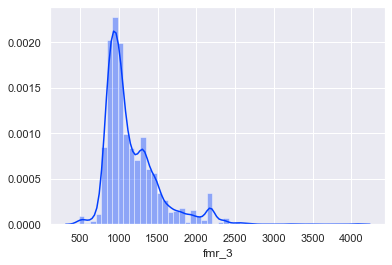

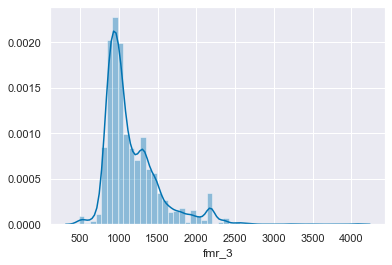

<Figure size 432x288 with 0 Axes>

In [38]:
# Loop through differences between bright and colorblind palettes
for p in ['bright', 'colorblind']:
    sns.set_palette(p)
    sns.distplot(fmr['fmr_3'])
    plt.show()
    
    # Clear the plots    
    plt.clf()

#### Creating Custom Palettes

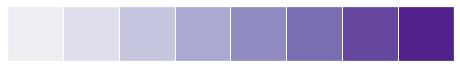

In [39]:
# Create the coolwarm palette
sns.palplot(sns.color_palette("Purples", 8))
plt.show()

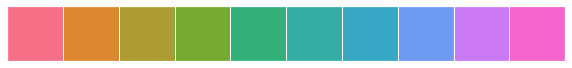

In [40]:
# Create the coolwarm palette
sns.palplot(sns.color_palette("husl", 10))
plt.show()

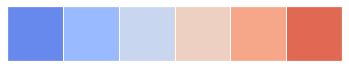

In [41]:
# Create the coolwarm palette
sns.palplot(sns.color_palette("coolwarm", 6))
plt.show()

#### Customizing with matplotlib
Matplotlib Axes
- Most customization available through `matplotlib` `Axes` objects
- `Axes` can be passed to seaborn functions

[Text(0.5, 0, 'Tuition 2013-14')]

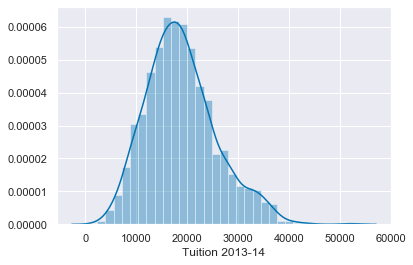

In [42]:
fig, ax = plt.subplots()
sns.distplot(college['Tuition'], ax=ax)
ax.set(xlabel="Tuition 2013-14")

#### Further Customizations
- The `axes` object supports many common customizations

[Text(0, 0.5, 'Distribution'),
 (0, 50000),
 Text(0.5, 0, 'Tuition 2013-14'),
 Text(0.5, 1.0, '2013-14 Tuition and Fees Distribution')]

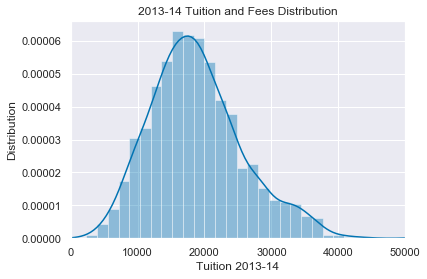

In [43]:
fig, ax = plt.subplots()
sns.distplot(college['Tuition'], ax=ax)

ax.set(xlabel="Tuition 2013-14", 
       ylabel="Distribution", xlim=(0, 50000), 
       title="2013-14 Tuition and Fees Distribution")

#### Using matplotlib axes

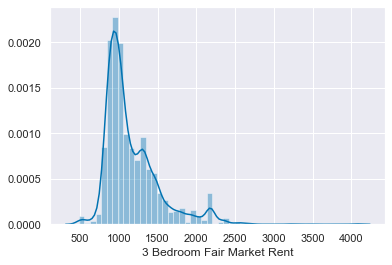

In [44]:
# Create a figure and axes
fig, ax = plt.subplots()

# Plot the distribution of data
sns.distplot(fmr['fmr_3'], ax=ax)

# Create a more descriptive x axis label
ax.set(xlabel="3 Bedroom Fair Market Rent")

# Show the plot
plt.show()

#### Additional plot customizations

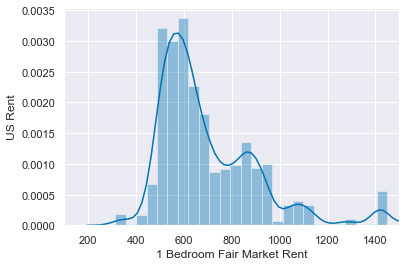

In [45]:
# Create a figure and axes
fig, ax = plt.subplots()

# Plot the distribution of 1 bedroom rents
sns.distplot(fmr['fmr_1'], ax=ax)

# Modify the properties of the plot
ax.set(xlabel="1 Bedroom Fair Market Rent", 
       xlim=(100,1500), ylabel="US Rent")

# Display the plot
plt.show()

#### Adding annotations

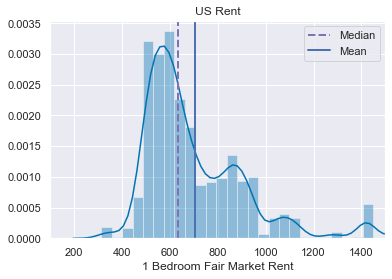

In [46]:
from numpy import median
from numpy import mean

# Create a figure and axes. Then plot the data
fig, ax = plt.subplots()
sns.distplot(fmr['fmr_1'], ax=ax)

# Customize the labels and limits
ax.set(xlabel="1 Bedroom Fair Market Rent", xlim=(100,1500), title="US Rent")

# Add vertical lines for the median and mean
ax.axvline(x=median(fmr['fmr_1']), color='m', label='Median', linestyle='--', linewidth=2)
ax.axvline(x=mean(fmr['fmr_1']), color='b', label='Mean', linestyle='-', linewidth=2)

# Show the legend and plot the data
ax.legend()
plt.show()

#### Multiple plots

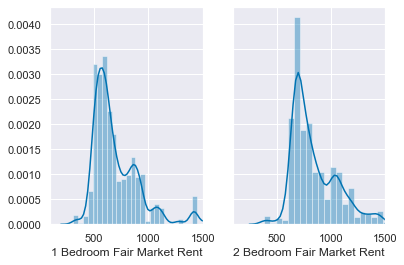

In [47]:
# Create a plot with 1 row and 2 columns that share the y axis label
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True)

# Plot the distribution of 1 bedroom apartments on ax0
sns.distplot(fmr['fmr_1'], ax=ax0)
ax0.set(xlabel="1 Bedroom Fair Market Rent", xlim=(100,1500))

# Plot the distribution of 2 bedroom apartments on ax1
sns.distplot(fmr['fmr_2'], ax=ax1)
ax1.set(xlabel="2 Bedroom Fair Market Rent", xlim=(100,1500))

# Display the plot
plt.show()

# 3. Categorical Plot Types

#### Categorical Data
- Data which takes on a limited and fixed number of values
- Normally combined with numeric data
- Examples include:
  - Geography (country, state, region)
  - Gender
  - Ethnicity
  - Blood type
  - Eye color

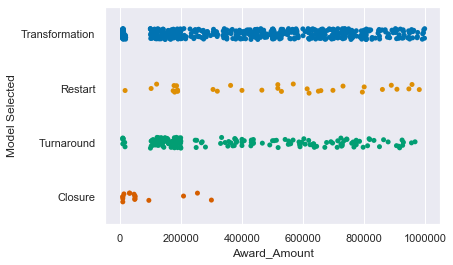

In [48]:
# Create the stripplot
sns.stripplot(data=school, x='Award_Amount', 
              y='Model Selected', jitter=True)

plt.show()

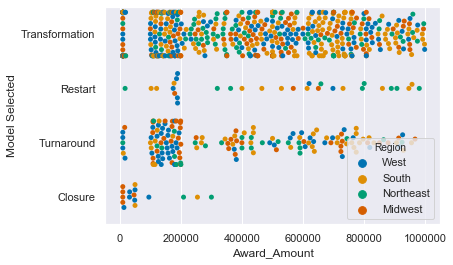

In [49]:
# Create and display a swarmplot with hue set to the Region
sns.swarmplot(data=school, x='Award_Amount', 
              y='Model Selected', hue='Region')

plt.show()

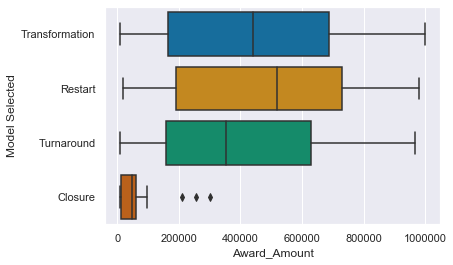

<Figure size 432x288 with 0 Axes>

In [50]:
# Create a boxplot
sns.boxplot(data=school, 
            x='Award_Amount', 
            y='Model Selected')

plt.show()
plt.clf()

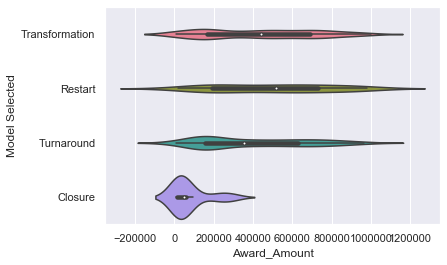

<Figure size 432x288 with 0 Axes>

In [51]:
# Create a violinplot with the husl palette
sns.violinplot(data=school, x='Award_Amount', 
               y='Model Selected', palette='husl')

plt.show()
plt.clf()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

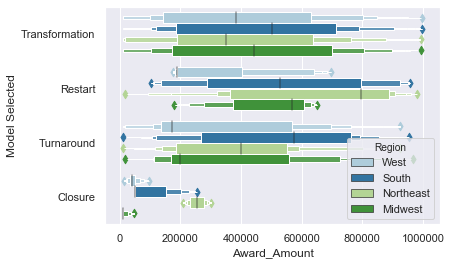

<Figure size 432x288 with 0 Axes>

In [52]:
# Create a lvplot with the Paired palette and the Region column as the hue
sns.lvplot(data=school, x='Award_Amount', 
           y='Model Selected', palette='Paired', hue='Region')

plt.show()
plt.clf()

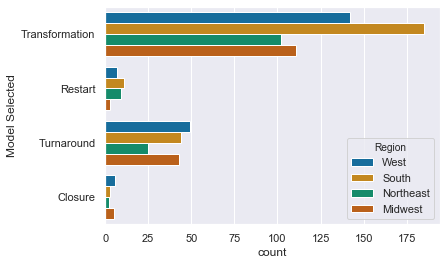

<Figure size 432x288 with 0 Axes>

In [53]:
# Show a countplot with the number of models used with each region a different color
sns.countplot(data=school, 
              y="Model Selected", 
              hue="Region")

plt.show()
plt.clf()

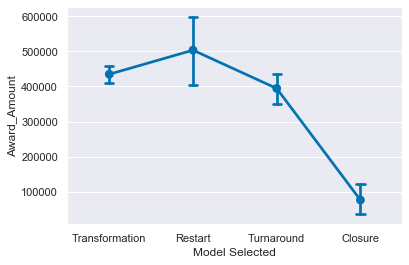

<Figure size 432x288 with 0 Axes>

In [54]:
# Create a pointplot and include the capsize in order to show bars on the confidence interval
sns.pointplot(data=school, y='Award_Amount', 
              x='Model Selected', capsize=.1)

plt.show()
plt.clf()

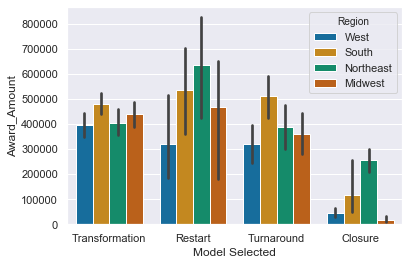

<Figure size 432x288 with 0 Axes>

In [55]:
# Create a barplot with each Region shown as a different color
sns.barplot(data=school, y='Award_Amount', 
            x='Model Selected', hue="Region")

plt.show()
plt.clf()

#### Regression Plots

Bicycle Dataset
- Aggregated bicycle sharing data in Washington DC
- Data includes:
  - Rental amounts
  - Weather information
  - Calendar information
- Can we predict rental amounts?

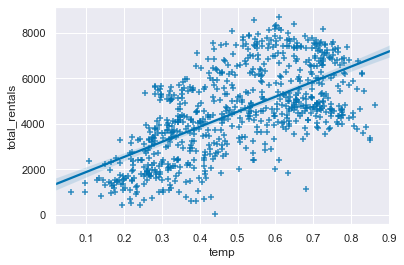

In [56]:
# Plotting with regplot()
sns.regplot(data=bike, x='temp', 
            y='total_rentals', marker='+')

#### Evaluating regression with residplot()
- A residual plot is useful for evaluating the fit of a model
- Seaborn supports through `residplot` function

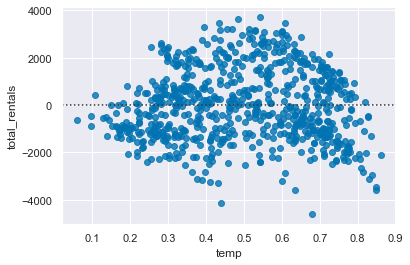

In [57]:
sns.residplot(data=bike, x='temp', 
              y='total_rentals')

#### Polynomial regression
- Seaborn supports polynomial regression using the `order` parameter

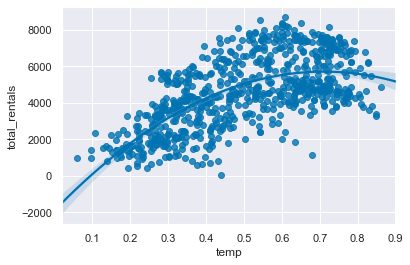

In [58]:
sns.regplot(data=bike, x='temp', 
            y='total_rentals', order=2)

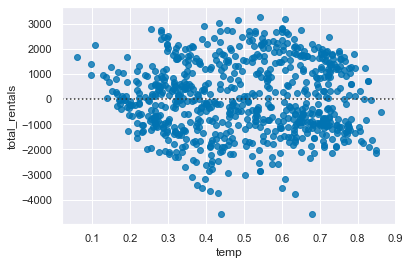

In [60]:
# Residplot with polynomial regression
sns.residplot(data=bike, x='temp', 
              y='total_rentals', order=2)

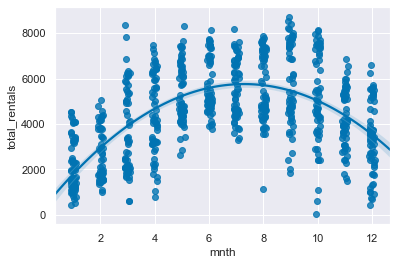

In [61]:
# Categorical values
sns.regplot(data=bike, x='mnth', y='total_rentals', 
            x_jitter=.1, order=2)

#### Estimators
In some cases, an x_estimator can be useful for highlighting trends

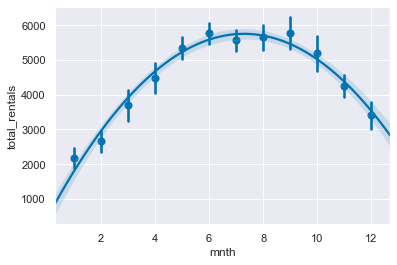

In [62]:
import numpy as np

sns.regplot(data=bike, x='mnth', y='total_rentals', 
            x_estimator=np.mean, order=2)

#### Binning the data
- `x_bins` can be used to divide the data into discrete bins
- The regression line is still fit against all the data

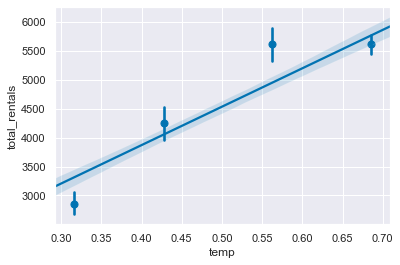

In [63]:
sns.regplot(data=bike, x='temp', 
            y='total_rentals', x_bins=4)

#### Regression and residual plots

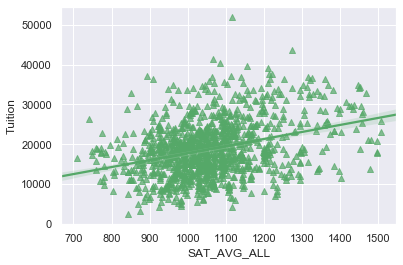

<Figure size 432x288 with 0 Axes>

In [73]:
# Display a regression plot for Tuition
sns.regplot(data=college, y='Tuition', x="SAT_AVG_ALL", 
            marker='^', color='g', scatter_kws={'alpha':0.7})

plt.show()
plt.clf()

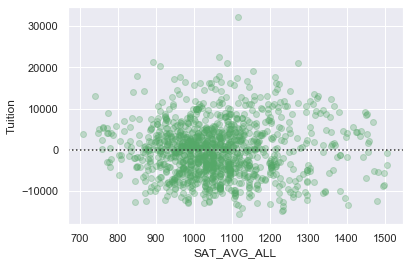

<Figure size 432x288 with 0 Axes>

In [70]:
# Display the residual plot
sns.residplot(data=college, y='Tuition', 
              x="SAT_AVG_ALL", color='g', scatter_kws={'alpha':0.3})

plt.show()
plt.clf()

#### Regression plot parameters

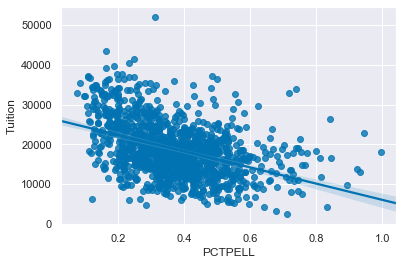

<Figure size 432x288 with 0 Axes>

In [74]:
# Plot a regression plot of Tuition and the Percentage of Pell Grants
sns.regplot(data=college, 
            y='Tuition', x="PCTPELL")

plt.show()
plt.clf()

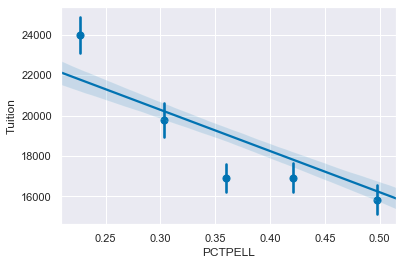

<Figure size 432x288 with 0 Axes>

In [75]:
# Create another plot that estimates the tuition by PCTPELL
sns.regplot(data=college, y='Tuition', 
            x="PCTPELL", x_bins=5)

plt.show()
plt.clf()

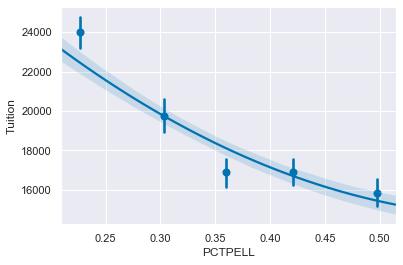

<Figure size 432x288 with 0 Axes>

In [76]:
# The final plot should include a line using a 2nd order polynomial
sns.regplot(data=college, y='Tuition', 
            x="PCTPELL", x_bins=5, order=2)

plt.show()
plt.clf()

#### Binning Data

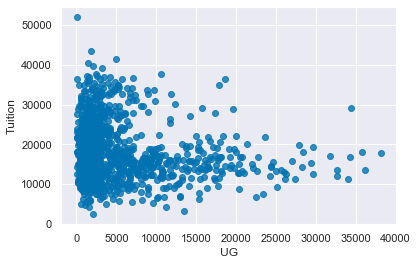

<Figure size 432x288 with 0 Axes>

In [77]:
# Create a scatter plot by disabling the regression line
sns.regplot(data=college, y='Tuition', 
            x="UG", fit_reg=False)

plt.show()
plt.clf()

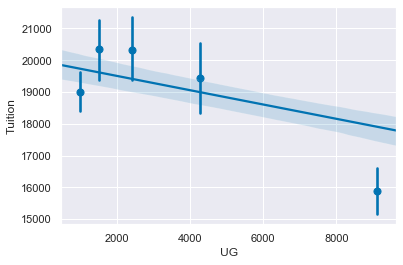

<Figure size 432x288 with 0 Axes>

In [78]:
# Create a scatter plot and bin the data into 5 bins
sns.regplot(data=college, y='Tuition', 
            x="UG", x_bins=5)

plt.show()
plt.clf()

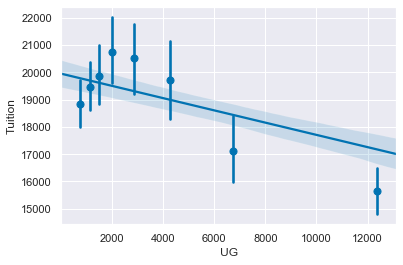

<Figure size 432x288 with 0 Axes>

In [79]:
# Create a regplot and bin the data into 8 bins
sns.regplot(data=college, y='Tuition', 
            x="UG", x_bins=8)

plt.show()
plt.clf()

#### Matrix Plots
Getting data in the right format
- Seaborn's `heatmap()` function requires data to be in a grid format
- pandas `crosstab()` is frequently used to manipulate the data

In [80]:
df_crosstab = pd.crosstab(bike["mnth"], bike["weekday"], 
            values = bike["total_rentals"], 
            aggfunc='mean').round(0)
df_crosstab

weekday,0,1,2,3,4,5,6
mnth,,,,,,,
1,1816.0,1927.0,2568.0,2139.0,2513.0,2446.0,1957.0
2,2248.0,2604.0,2824.0,2813.0,2878.0,2933.0,2266.0
3,3301.0,3546.0,3574.0,3670.0,3817.0,3926.0,3939.0
4,4417.0,4516.0,4556.0,4331.0,4764.0,4387.0,4446.0
5,5320.0,4512.0,5025.0,5119.0,5893.0,5751.0,5978.0
6,5940.0,5478.0,5681.0,5701.0,5622.0,5616.0,6344.0
7,5298.0,5792.0,5844.0,5814.0,5624.0,5406.0,5232.0
8,4703.0,5518.0,5930.0,6077.0,6038.0,5958.0,5224.0
9,6160.0,5637.0,5184.0,5668.0,5486.0,5747.0,6394.0


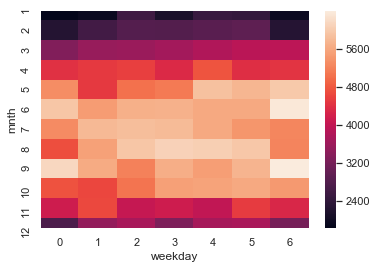

In [81]:
# Build a heatmap
sns.heatmap(pd.crosstab(bike["mnth"], bike["weekday"], 
                        values=bike["total_rentals"], aggfunc='mean'))

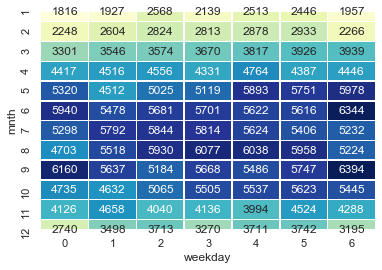

In [82]:
# Customize a heatmap
sns.heatmap(df_crosstab, annot=True, fmt='.4g', 
            cmap="YlGnBu", cbar=False, linewidths=.5)

#### Centering a heatmap
Seaborn support centering the heatmap colors on a specific value

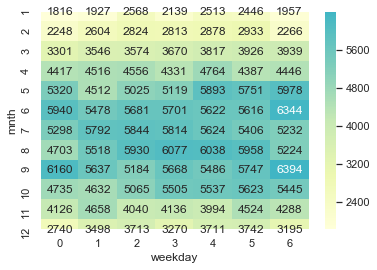

In [83]:
sns.heatmap(df_crosstab, annot=True, fmt='.4g', cmap="YlGnBu", cbar=True, 
            center=df_crosstab.loc[9, 6])

#### Plotting a correlation matrix
- Pandas `corr` function calculates correlations between columns in a dataframe
- The output can be converted to a heatmap with seaborn

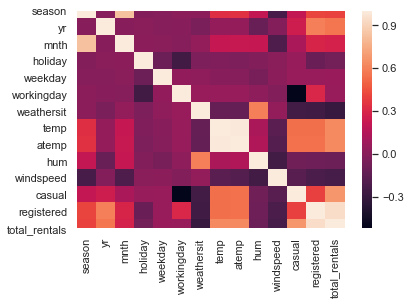

In [84]:
sns.heatmap(bike.corr())

YEAR            1999  2000  2001  2002  2003  2004  2005  2006  2007  2008  \
Group                                                                        
Academic           0     0     2     0     4     1    12     9    13     5   
Acting           108   100    92    84    74    51    44    44    25    26   
Advocacy           0     1     0     1     0     4     0     0     2     3   
Athletics          0     3     1     2     0     2     2     5     4     1   
Business           0     1     0     0     0     2     1     1     2     1   
Clergy             0     0     0     1     1     1     0     0     1     0   
Comedy            25    12    11     5    12     7     5     8     9     7   
Consultant         0     0     0     0     1     4     1     4     2     3   
Government         0     0     2     1     2     3     1     3     1     0   
Media             11    21    31    42    41    45    54    47    47    77   
Military           0     0     0     0     0     0     1     1  

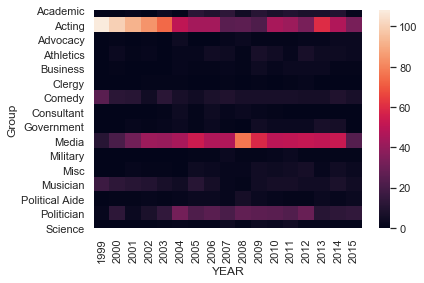

In [85]:
# Creating Heatmap
# Create a crosstab table of the data
pd_crosstab = pd.crosstab(daily["Group"], daily["YEAR"])
print(pd_crosstab)

# Plot a heatmap of the table
sns.heatmap(pd_crosstab)

# Rotate tick marks for visibility
plt.yticks(rotation=0)
plt.xticks(rotation=90)

plt.show()

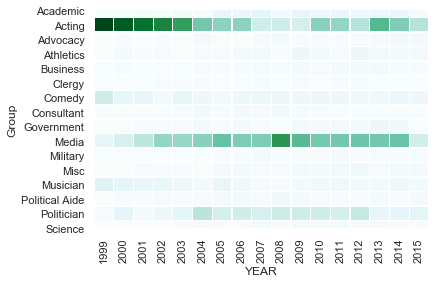

<Figure size 432x288 with 0 Axes>

In [88]:
# Customizing heatmaps
# Create the crosstab DataFrame
pd_crosstab = pd.crosstab(daily["Group"], daily["YEAR"])

# Plot a heatmap of the table with no color bar and using the BuGn palette
sns.heatmap(pd_crosstab, cbar=False, cmap="BuGn", linewidths=.3)

# Rotate tick marks for visibility
plt.yticks(rotation=0)
plt.xticks(rotation=90)

#Show the plot
plt.show()
plt.clf()

# 4. Using FacetGrid, factorplot and lmplot

#### Tidy data
- Seaborn's grid plots require data in "tidy format"
- One observation per row of data

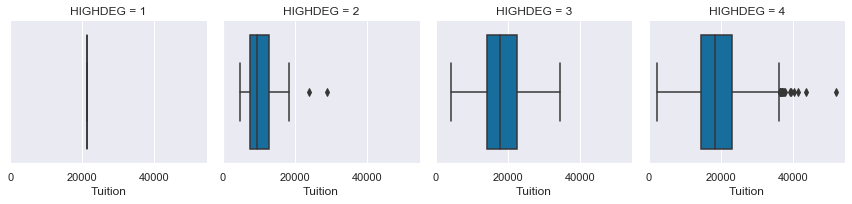

In [89]:
# FacetGrid Categorical Example
g = sns.FacetGrid(college, col="HIGHDEG")
g.map(sns.boxplot, 'Tuition', 
      order=['1', '2', '3', '4'])

#### `factorplot()`
- The `factorplot` is a simpler way to use a `FacetGrid` for categorical data
- Combines the facetting and mapping process into 1 function

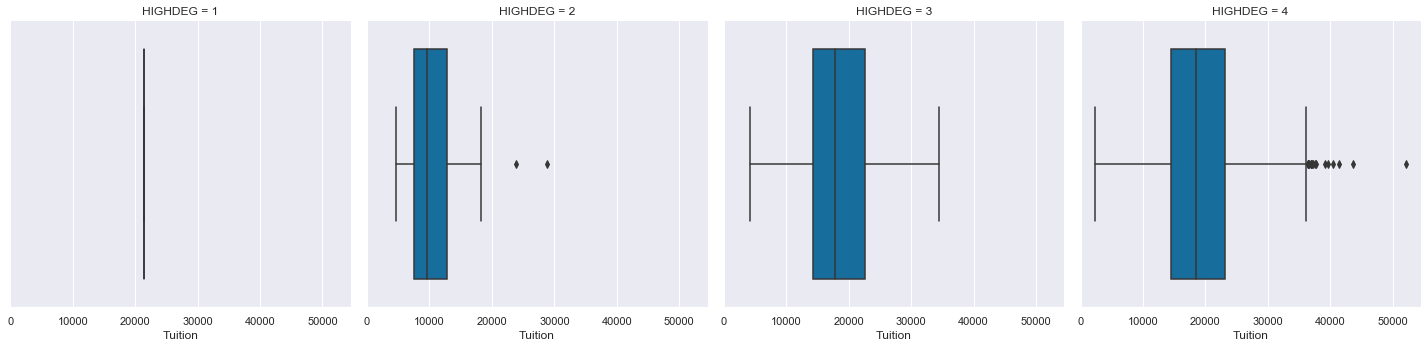

In [90]:
sns.factorplot(x="Tuition", data=college, 
               col="HIGHDEG", kind='box')

#### FacetGrid for regression
- `FacetGrid()` can also be used for scatter or regression plots

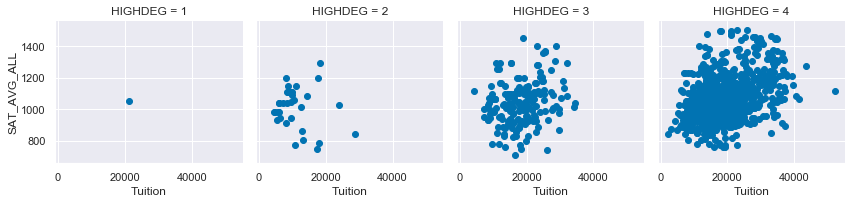

In [91]:
g = sns.FacetGrid(college, col="HIGHDEG")
g.map(plt.scatter, 
      'Tuition', 'SAT_AVG_ALL')

#### `lmplot`
- `lmplot` plots scatter and regression plots on a `FacetGrid`

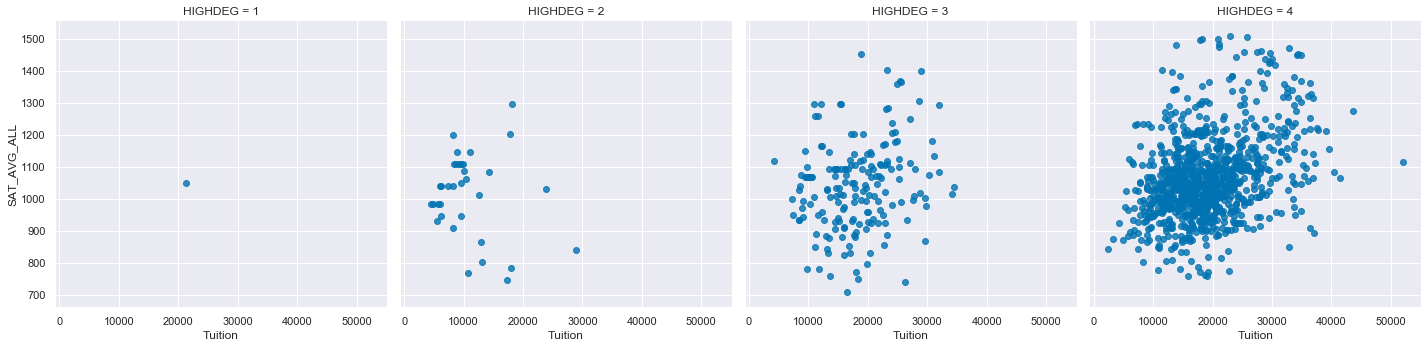

In [92]:
sns.lmplot(data=college, x="Tuition", y="SAT_AVG_ALL", 
           col="HIGHDEG", fit_reg=False)

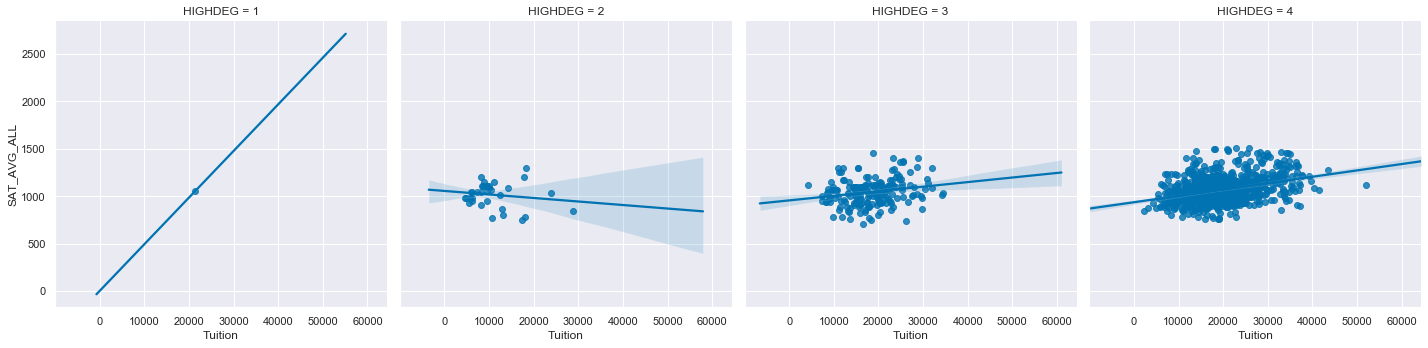

In [93]:
#### lmplot with regression
sns.lmplot(data=college, x="Tuition", 
           y="SAT_AVG_ALL", col="HIGHDEG")

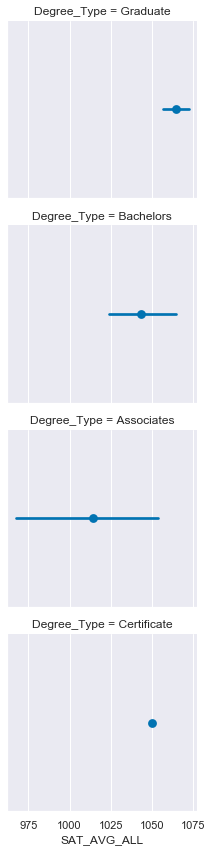

<Figure size 432x288 with 0 Axes>

In [94]:
# Create FacetGrid with Degree_Type and specify the order of the rows using row_order
g2 = sns.FacetGrid(college, row="Degree_Type", 
                   row_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'])

# Map a pointplot of SAT_AVG_ALL onto the grid
g2.map(sns.pointplot, 'SAT_AVG_ALL')

# Show the plot
plt.show()
plt.clf()

#### Using a factorplot

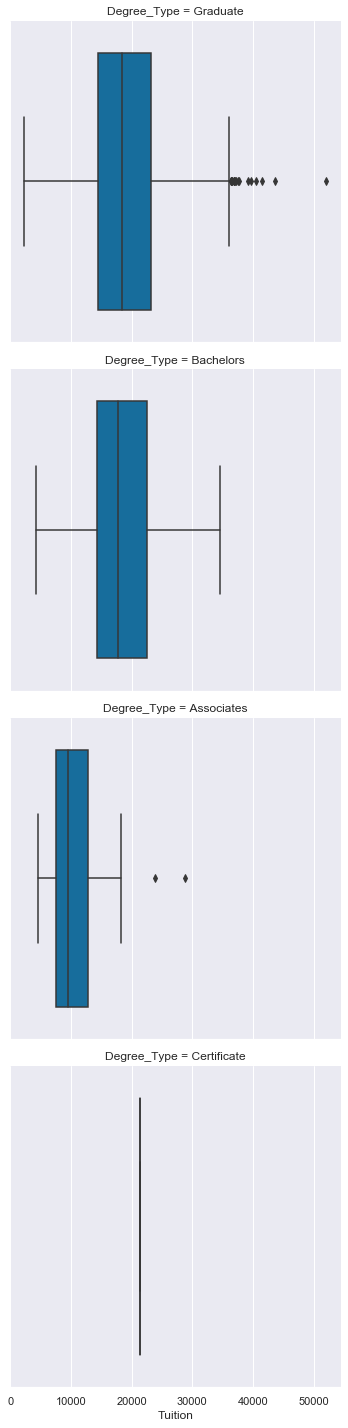

<Figure size 432x288 with 0 Axes>

In [95]:
# Create a factor plot that contains boxplots of Tuition values
sns.factorplot(data=college, x='Tuition', 
               kind='box', row='Degree_Type')

plt.show()
plt.clf()

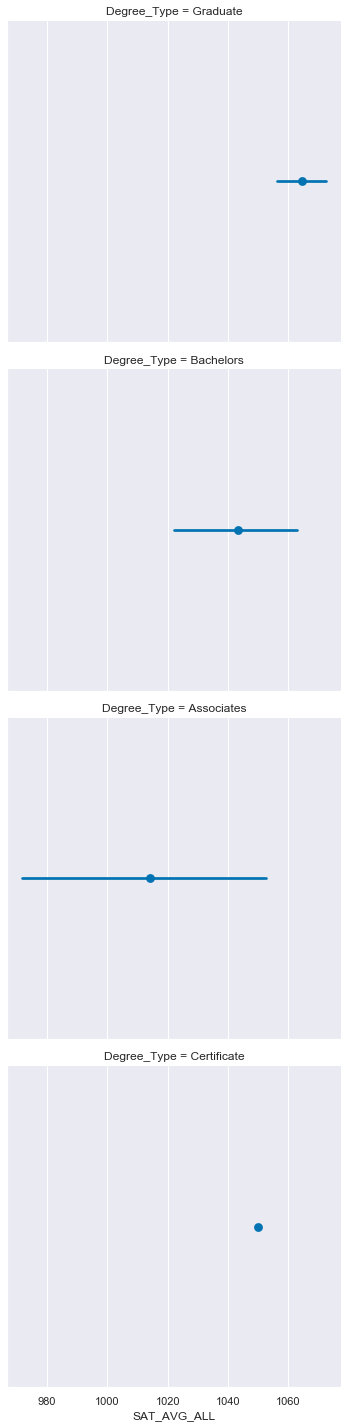

<Figure size 432x288 with 0 Axes>

In [96]:
# Create a facetted pointplot of Average SAT_AVG_ALL scores facetted by Degree Type 
sns.factorplot(data=college, x='SAT_AVG_ALL', kind='point', 
               row='Degree_Type', row_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'])

plt.show()
plt.clf()

#### Using a lmplot

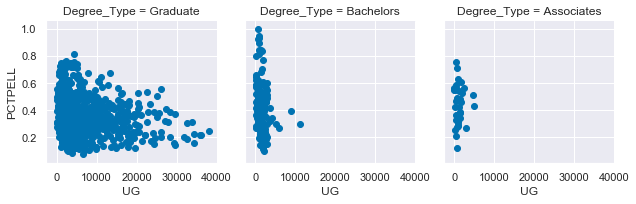

<Figure size 432x288 with 0 Axes>

In [97]:
# Degree order
degree_ord = ["Graduate", "Bachelors", "Associates"]

# Create a FacetGrid varying by column and columns ordered with the degree_order variable
g = sns.FacetGrid(college, col="Degree_Type", col_order=degree_ord)

# Map a scatter plot of Undergrad Population compared to PCTPELL
g.map(plt.scatter, 'UG', 'PCTPELL')

plt.show()
plt.clf()

#### Using PairGrid and pairplot

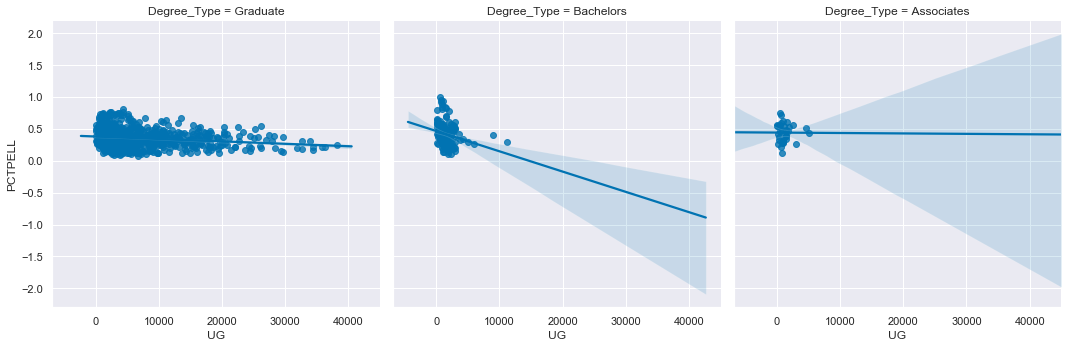

<Figure size 432x288 with 0 Axes>

In [98]:
# Re-create the plot above as an lmplot
sns.lmplot(data=college, x='UG', y='PCTPELL', 
           col="Degree_Type", col_order=degree_ord)

plt.show()
plt.clf()

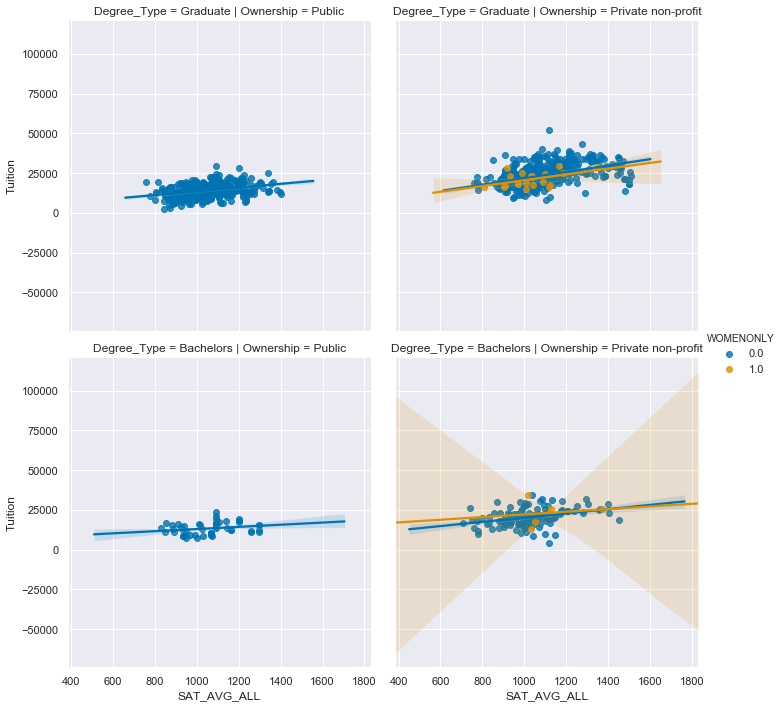

<Figure size 432x288 with 0 Axes>

In [99]:
# Ownership order
inst_ord = ["Public", "Private non-profit"]

# Create an lmplot that has a column for Ownership, a row for Degree_Type and hue based on the WOMENONLY column
sns.lmplot(data=college, x='SAT_AVG_ALL', y='Tuition', 
           col="Ownership", row='Degree_Type', 
           row_order=['Graduate', 'Bachelors'], 
           hue='WOMENONLY', col_order=inst_ord)

plt.show()
plt.clf()

#### Using PairGrid and pairplot

Pairwise relationships
- `PairGrid` shows pairwise relationships between data elements

#### Creating a PairGrid
- The `PairGrid` follows similar API to FacetGrid

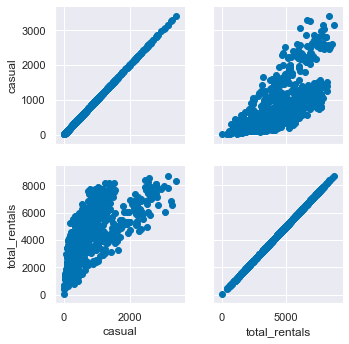

In [100]:
g = sns.PairGrid(bike, vars=["casual", "total_rentals"])
g = g.map(plt.scatter)

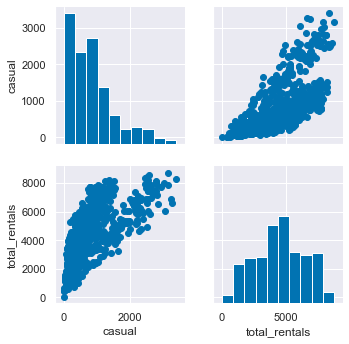

In [101]:
#Customizing the PairGrid diagonals
g = sns.PairGrid(bike, vars=["casual", "total_rentals"])
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)

#### Pairplot
- `pairplot` is a shortcut for the `PairGrid`

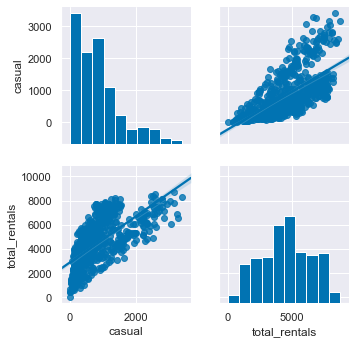

In [102]:
sns.pairplot(bike, vars=["casual", "total_rentals"], 
             kind='reg', diag_kind='hist')

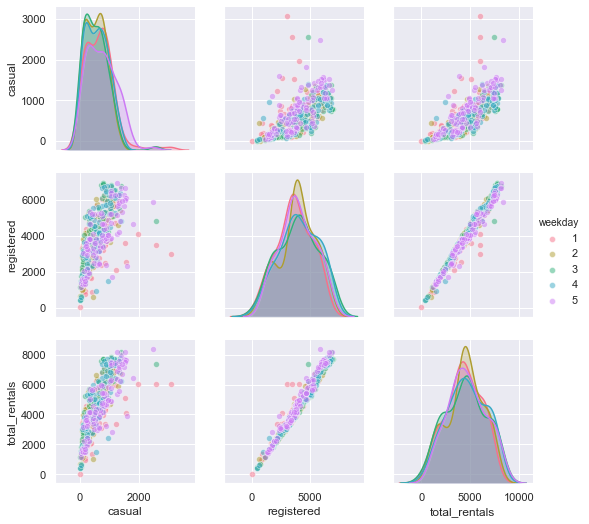

In [103]:
# Customizing a pairplot
sns.pairplot(bike.query('weekday > 0 and weekday < 6'), vars=["casual", "registered", "total_rentals"], 
             hue='weekday', palette='husl', plot_kws={'alpha': 0.5})

#### Building a PairGrid

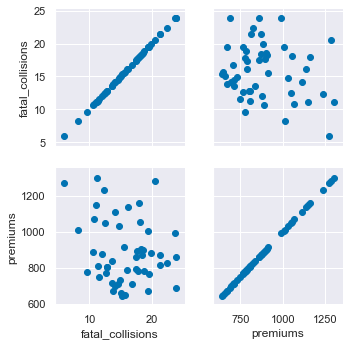

<Figure size 432x288 with 0 Axes>

In [104]:
# Create a PairGrid with a scatter plot for fatal_collisions and premiums
g = sns.PairGrid(insurance, vars=["fatal_collisions", "premiums"])
g2 = g.map(plt.scatter)

plt.show()
plt.clf()

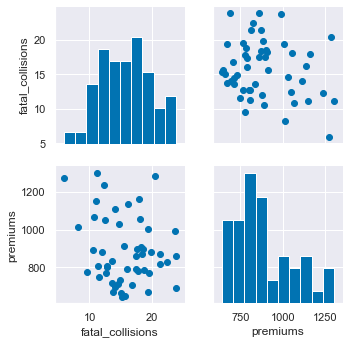

<Figure size 432x288 with 0 Axes>

In [105]:
# Create the same PairGrid but map a histogram on the diag
g = sns.PairGrid(insurance, vars=["fatal_collisions", "premiums"])
g2 = g.map_diag(plt.hist)
g3 = g2.map_offdiag(plt.scatter)

plt.show()
plt.clf()

#### Using a pairplot

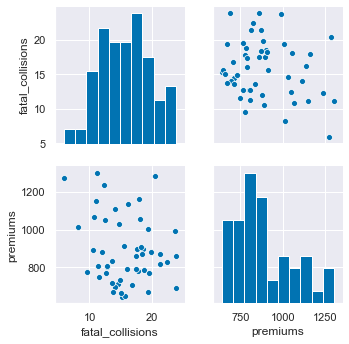

<Figure size 432x288 with 0 Axes>

In [106]:
# Create a pairwise plot of the variables using a scatter plot
sns.pairplot(data=insurance, 
             vars=["fatal_collisions", "premiums"],
             kind='scatter')

plt.show()
plt.clf()

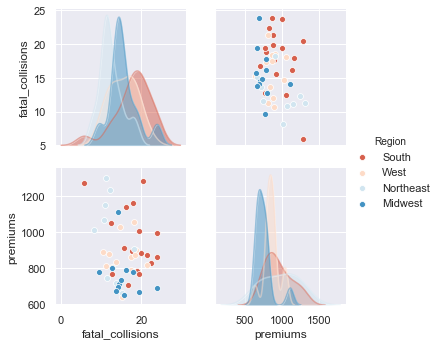

<Figure size 432x288 with 0 Axes>

In [107]:
# Plot the same data but use a different color palette and color code by Region
sns.pairplot(data=insurance, vars=["fatal_collisions", "premiums"], 
             kind='scatter', hue='Region', palette='RdBu', diag_kws={'alpha':.5})

plt.show()
plt.clf()

#### Additional pairplots

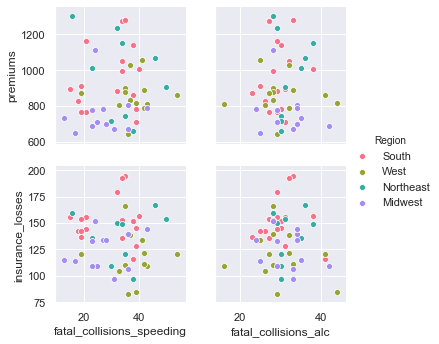

<Figure size 432x288 with 0 Axes>

In [108]:
# Build a pairplot with different x and y variables
sns.pairplot(data=insurance, x_vars=["fatal_collisions_speeding", "fatal_collisions_alc"], 
             y_vars=['premiums', 'insurance_losses'], kind='scatter', hue='Region', palette='husl')

plt.show()
plt.clf()

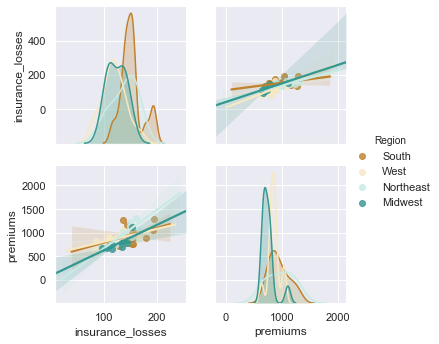

<Figure size 432x288 with 0 Axes>

In [109]:
# plot relationships between insurance_losses and premiums
sns.pairplot(data=insurance, vars=["insurance_losses", "premiums"], 
             kind='reg', palette='BrBG', diag_kind = 'kde', hue='Region')

plt.show()
plt.clf()

#### Using JointGrid and jointplot

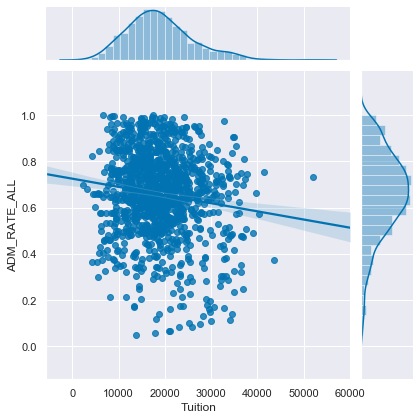

In [110]:
# Basic JointGrid
g = sns.JointGrid(data=college, 
                  x="Tuition", y="ADM_RATE_ALL")

g.plot(sns.regplot, sns.distplot)

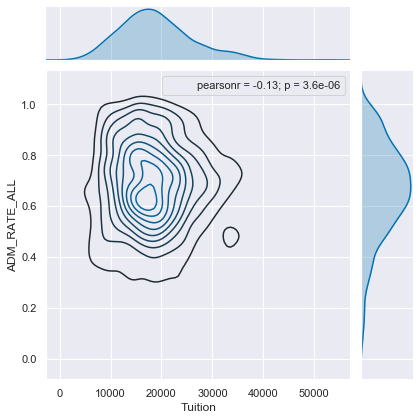

In [111]:
from scipy import stats

# Advanced JointGrid
g = sns.JointGrid(data=college, 
                  x="Tuition", y="ADM_RATE_ALL")
g = g.plot_joint(sns.kdeplot)
g = g.plot_marginals(sns.kdeplot, shade=True)
g = g.annotate(stats.pearsonr)

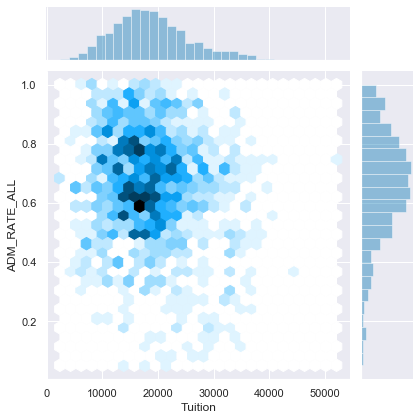

In [112]:
# jointplot()
sns.jointplot(data=college, x="Tuition", 
              y="ADM_RATE_ALL", kind='hex')

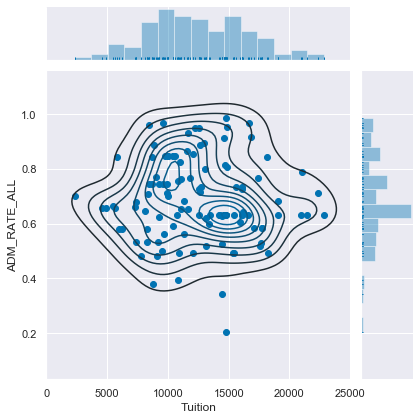

In [113]:
# Customizing a jointplot
g = (sns.jointplot(x="Tuition", 
                   y="ADM_RATE_ALL", kind='scatter', xlim=(0, 25000), 
                   marginal_kws=dict(bins=15,rug=True), 
                   data=college.query('UG < 2500 & Ownership == "Public"')).plot_joint(sns.kdeplot))

#### Building a JointGrid and jointplot

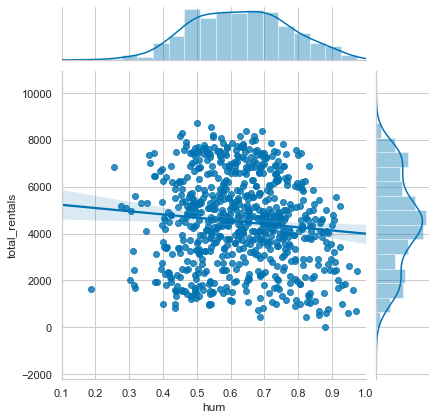

<Figure size 432x288 with 0 Axes>

In [114]:
# Build a JointGrid comparing humidity and total_rentals
sns.set_style("whitegrid")

g = sns.JointGrid(x="hum", y="total_rentals", 
                  data=bike, xlim=(0.1, 1.0)) 

g.plot(sns.regplot, sns.distplot)

plt.show()
plt.clf()

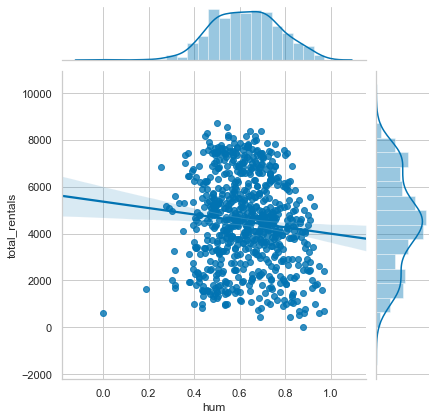

<Figure size 432x288 with 0 Axes>

In [115]:
# Create a jointplot similar to the JointGrid 
sns.jointplot(x="hum", y="total_rentals", 
              kind='reg', data=bike)

plt.show()
plt.clf()

#### Jointplots and regression

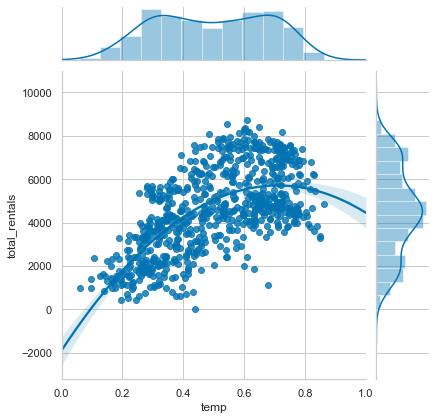

<Figure size 432x288 with 0 Axes>

In [116]:
# Plot temp vs. total_rentals as a regression plot
sns.jointplot(x="temp", y="total_rentals", kind='reg', 
              data=bike, order=2, xlim=(0, 1))

plt.show()
plt.clf()

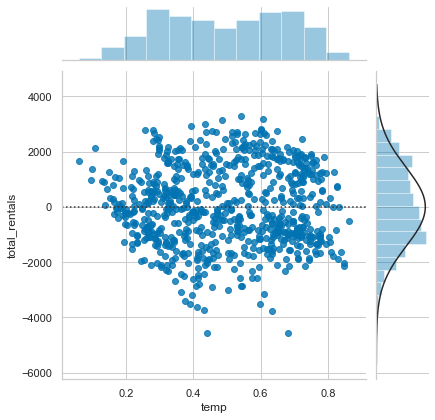

<Figure size 432x288 with 0 Axes>

In [117]:
# Plot a jointplot showing the residuals
sns.jointplot(x="temp", y="total_rentals", 
              kind='resid', data=bike, order=2)

plt.show()
plt.clf()

#### Complex jointplots

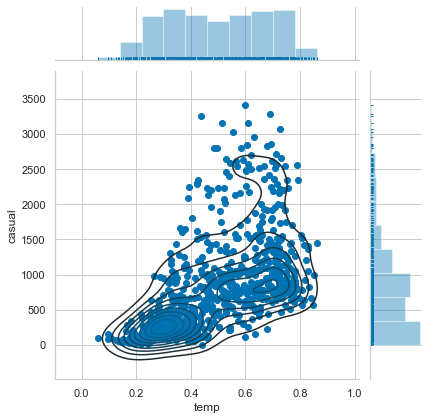

<Figure size 432x288 with 0 Axes>

In [118]:
# Create a jointplot of temp vs. casual riders
# Include a kdeplot over the scatter plot
g = (sns.jointplot(x="temp", y="casual", kind='scatter', data=bike, 
                   marginal_kws=dict(bins=10, rug=True)).plot_joint(sns.kdeplot))
    
plt.show()
plt.clf()

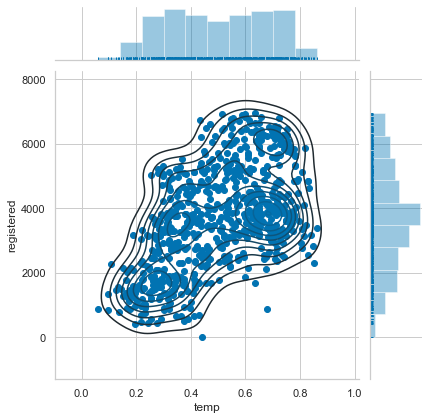

<Figure size 432x288 with 0 Axes>

In [119]:
# Replicate the above plot but only for registered riders
g = (sns.jointplot(x="temp", y="registered", kind='scatter', 
                   data=bike, marginal_kws=dict(bins=10, rug=True)).plot_joint(sns.kdeplot))

plt.show()
plt.clf()

#### Conclusion: Selecting Seaborn Plots

Univariate Distribution Analysis
- `distplot()` is the best place to start for this analysis
- `rugplot()` and `kdeplot()` can be useful alternatives

Regression Analysis
- `lmplot()` performs regression analysis and supports facetting

Categorical Plots
- Explore data with the categorical plots and facet with `factorplot()`

`pairplot()` and `jointplot()`
- Perform regression analysis with `lmplot`
- Analyze distributions with `distplot`